Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                64064     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 66243 (258.76 KB)
Trainable params: 66243 (258.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
118/118 [==============================] - 3s 8ms/step - loss: 0.7487 - accuracy: 0.7218 - val_loss: 0.5628 - val_accuracy: 0.7762
Epoch 2/5
118/118 [==============================] - 0s 4ms/step - loss: 0.5087 - accuracy: 0.8067 - val_loss: 0.5201 - val_accuracy: 0.8017


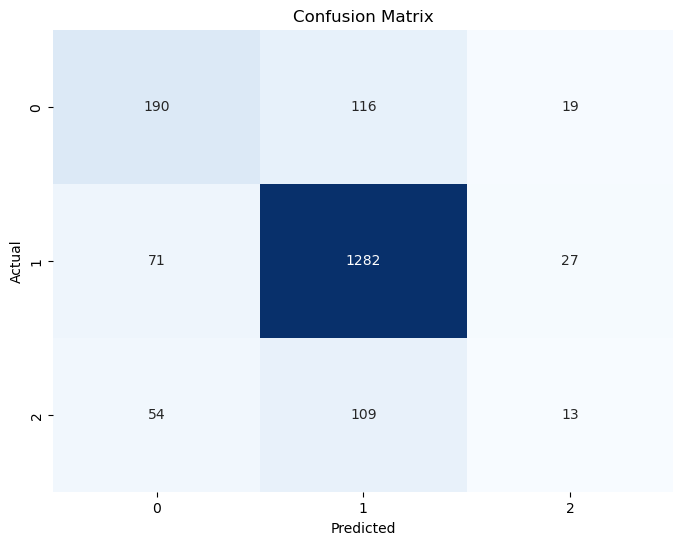


Accuracy: 0.7894736842105263

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.58      0.59       325
           1       0.85      0.93      0.89      1380
           2       0.22      0.07      0.11       176

    accuracy                           0.79      1881
   macro avg       0.56      0.53      0.53      1881
weighted avg       0.75      0.79      0.76      1881



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = pd.read_excel("Book1.xlsx")

tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,  # Adjust the number of features as needed
    stop_words="english"  
)

tfidf_matrix = tfidf_vectorizer.fit_transform(data['processed_reviews'])

tfidf_dense_matrix = tfidf_matrix.toarray()

target_column = "review_tag"
features_columns = tfidf_vectorizer.get_feature_names_out()

X = tfidf_dense_matrix

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data[target_column])  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Three classes: 'good', 'moderate', 'bad'

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
y_pred = [tf.argmax(pred).numpy() for pred in predictions]

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

accuracy = accuracy_score(y_test, y_pred)

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))